In [362]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(16,6)}, style="whitegrid")
sns.set(font_scale=1.5)

In [363]:
# Создание датафрейма на химию егэ

In [364]:
him_ege_mayer=pd.read_excel('him_ege_mayer.xlsx', sheet_name='Лист1',header=None)

In [365]:
him_ege_mayer

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,1 веб,NaN,NaN,2 веб,NaN,NaN,3 веб,NaN,NaN,4 веб,...,NaN,14 веб,NaN,NaN,15 веб,NaN,NaN,16 веб,NaN,NaN
1,Строение атома и электронные конфигурации.,NaN,NaN,Работа с таблицей Менделеева. Закономерности и...,NaN,NaN,Степень окисления и валентность.,NaN,NaN,Основы решения задач. Задание 26 на приготовле...,...,NaN,Гидролиз. Среда раствора. Индикаторы.,NaN,NaN,"Основно-кислотные взаимодействия. Реакции ""выт...",NaN,NaN,Задание 28. Расчёты по уравнениям реакций.,NaN,NaN
2,УМИТ (название),УМИТ (номер в базе),СТАТУС\nРазбирается – детальное исследование о...,УМИТ (название),УМИТ (номер в базе),СТАТУС\nРазбирается – детальное исследование о...,УМИТ (название),УМИТ (номер в базе),СТАТУС\nРазбирается – детальное исследование о...,УМИТ (название),...,СТАТУС\nРазбирается – детальное исследование о...,УМИТ (название),УМИТ (номер в базе),СТАТУС\nРазбирается – детальное исследование о...,УМИТ (название),УМИТ (номер в базе),СТАТУС\nРазбирается – детальное исследование о...,УМИТ (название),УМИТ (номер в базе),СТАТУС\nРазбирается – детальное исследование о...
3,Атом и его строение,1,Разбирается,Умение описывать свойства химического элемента...,5,Разбирается,Понятие валентности и валентные возможности ат...,6,Разбирается,Установление логических связей,...,Разбирается,Кислотность среды. Понятие рН,28,Разбирается,Реакции ионного обмена. Правило Бертолле,40,Проходится,Установление логических \nсвязей,1202,Проходится
4,Порядок заполнения электронных орбиталей элект...,4,Разбирается,Понятие валентности и валентные возможности ат...,6,Проходится,Понятия электроотрицательности и ионизации хим...,7,Проходится,Способы выражения концентрации вещества,...,Разбирается,Умение различать щелочи и нерастворимые гидрок...,401,Проходится,Классификация химических реакций. Реакции соед...,1204,Проходится,Понятие количества вещества,1211,Проходится
5,"Понятия электронной конфигурации, энергетическ...",29,Разбирается,Понятия электроотрицательности и ионизации хим...,7,Разбирается,Случаи несовпадения валентности и степени окис...,36,Разбирается,Понятие количества вещества,...,Проходится,Умение различать сильные и слабые основания,402,Разбирается,Обратимые и необратимые химические реакции,1205,Проходится,Понятие массовой доли вещества / элемента,1212,Проходится
6,Понятие проскока электрона,30,Разбирается,Понятие окислительно-восстановительных свойств,8,Проходится,Степень окисления элементов. Окислитель и восс...,45,Проходится,Понятие массовой доли вещества / элемента,...,Проходится,Умение определять сильные и слабые кислоты,501,Разбирается,Умение определять признак(-и) реакции,1243,Проходится,Умение составлять и решать пропорции,1213,Проходится
7,Основное состояние атома,31,Разбирается,Изменение радиуса атомов в зависимости от поло...,33,Разбирается,Умение определять степень окисления элемента в...,47,Разбирается,Умение составлять и решать пропорции,...,Проходится,Гидролиз солей,615,Разбирается,Основно-кислотные взаимодействия и их принципы,1257,Разбирается,Понятие объема вещества,1214,Проходится
8,Возбужденное состояние атома,32,Разбирается,Изменение электроотрицательности атомов в зави...,34,Разбирается,Валентные электроны,54,Проходится,Понятие объема вещества,...,Проходится,Гидролиз веществ и определение среды раствора....,1255,Разбирается,NaN,NaN,NaN,Понятие массы вещества,1215,Проходится
9,Валентные электроны,54,Разбирается,Изменение окислительных и восстановительных св...,35,Разбирается,Умение определять возможные степени окисления ...,57,Проходится,Понятие массы вещества,...,Разбирается,NaN,NaN,NaN,NaN,NaN,NaN,Понятие теоретически возможного и практическог...,1218,Разбирается


In [366]:
# Создадим пустой dataframe
new_him_ege_mayer=pd.DataFrame(columns=['discipline', 'appointment','teacher','webinar','name_ymit','ymit','insight'])
# Создадим словарь с нужными значениями 
him_ege_mayer_info={'discipline':'him','appointment':'ege','teacher':'mayer'}
# Обозначим границы итерации 
ferst_border=0
last_border=2
# Цикл по трем столбцам 
for i in range(int(him_ege_mayer.shape[1]/3)):
    #Средняя граница итерации
    midl_border=ferst_border+1
    # создаем фрейм с отброшенными первыми 3 строками
    new_change_data=him_ege_mayer.loc[3:,ferst_border:last_border]
    # Обозночаем номер вебинара
    web=him_ege_mayer.iloc[0][ferst_border]
    # Вносим данные из словаря
    new_change_data.insert(0, 'discipline', him_ege_mayer_info['discipline'])
    new_change_data.insert(1, 'appointment', him_ege_mayer_info['appointment'])
    new_change_data.insert(2, 'teacher', him_ege_mayer_info['teacher'])
    new_change_data.insert(3,'webinar', web)
    # переименуем некоторые атрибуты 
    new_change_data=new_change_data.rename(columns={ferst_border:'name_ymit',midl_border:'ymit',last_border:'insight'})
    new_change_data=new_change_data.query("ymit == ymit or name_ymit == name_ymit or insight == insight") 
    new_him_ege_mayer = new_him_ege_mayer.append(new_change_data, ignore_index = True)
    # Присвоим новые границы для слудующей итерации 
    ferst_border+=3
    last_border+=3
# Выведем сформированный фрейм
new_him_ege_mayer

,discipline,appointment,teacher,webinar,name_ymit,ymit,insight
0,him,ege,mayer,1 веб,Атом и его строение,1,Разбирается
1,him,ege,mayer,1 веб,Порядок заполнения электронных орбиталей элект...,4,Разбирается
2,him,ege,mayer,1 веб,"Понятия электронной конфигурации, энергетическ...",29,Разбирается
3,him,ege,mayer,1 веб,Понятие проскока электрона,30,Разбирается
4,him,ege,mayer,1 веб,Основное состояние атома,31,Разбирается
...,...,...,...,...,...,...,...
143,him,ege,mayer,16 веб,Нахождение объёма вещества,1224,Проходится
144,him,ege,mayer,16 веб,Нахождение массы вещества,1225,Проходится
145,him,ege,mayer,16 веб,Умение выстраивать алгоритм действий на основе...,1229,Проходится
146,him,ege,mayer,16 веб,Умение составлять и решать уравнения для опред...,1230,Проходится


In [367]:
new_him_ege_mayer.query("webinar=='7 веб'") # Проверка

,discipline,appointment,teacher,webinar,name_ymit,ymit,insight
70,him,ege,mayer,7 веб,"Факторы, влияющие на скорость химической реакции",23,Разбирается
71,him,ege,mayer,7 веб,Гомогенные и гетерогенные химические реакции,1207,Проходится
72,him,ege,mayer,7 веб,Влияние катализаторов и ингибиторов на скорост...,1251,Разбирается
73,him,ege,mayer,7 веб,Умение составлять и решать пропорции,1213,NaN


In [368]:
# Создание датафрейма на инфу огэ

In [369]:
inf_oge_frolov=pd.read_excel('inf_oge_frolov.xlsx', sheet_name='Лист1',header=None)

In [370]:
new_inf_oge_frolov=pd.DataFrame(columns=['discipline', 'appointment','teacher','webinar','name_ymit','ymit','insight'])
inf_oge_frolov_info={'discipline':'inf','appointment':'oge','teacher':'frolov'}
ferst_border=0
last_border=2
for i in range(int(inf_oge_frolov.shape[1]/3)):
    midl_border=ferst_border+1
    new_change_data=inf_oge_frolov.loc[3:,ferst_border:last_border]
    web=inf_oge_frolov.iloc[0][ferst_border]
    new_change_data.insert(0, 'discipline', inf_oge_frolov_info['discipline'])
    new_change_data.insert(1, 'appointment', inf_oge_frolov_info['appointment'])
    new_change_data.insert(2, 'teacher', inf_oge_frolov_info['teacher'])
    new_change_data.insert(3,'webinar', web)
    new_change_data=new_change_data.rename(columns={ferst_border:'name_ymit',midl_border:'ymit',last_border:'insight'})
    new_change_data=new_change_data.query("ymit == ymit or name_ymit == name_ymit or insight == insight") 
    new_inf_oge_frolov = new_inf_oge_frolov.append(new_change_data, ignore_index = True)
    ferst_border+=3
    last_border+=3
new_inf_oge_frolov

,discipline,appointment,teacher,webinar,name_ymit,ymit,insight
0,inf,oge,frolov,1 веб,Умение находить нестандартные способы решения,9,Проходится
1,inf,oge,frolov,1 веб,Умение читать и понимать алгоритм,27,Разбирается
2,inf,oge,frolov,1 веб,Единицы измерения информации,108,Проходится
3,inf,oge,frolov,1 веб,Декодирование информации,121,Проходится
4,inf,oge,frolov,1 веб,Кодировка Unicode,123,Проходится
...,...,...,...,...,...,...,...
182,inf,oge,frolov,12 веб,Декодирование информации,121,Проходится
183,inf,oge,frolov,12 веб,Символ,137,Проходится
184,inf,oge,frolov,12 веб,Однозначное декодирование,138,Проходится
185,inf,oge,frolov,12 веб,Посимвольное кодирование,141,Проходится


In [371]:
# Создание датафрейма на историю 10

In [372]:
ist_10c_ravich=pd.read_excel('ist_10c_ravich.xlsx', sheet_name='Лист1',header=None)

In [373]:
new_ist_10c_ravich=pd.DataFrame(columns=['discipline', 'appointment','teacher','webinar','name_ymit','ymit','insight'])
ist_10c_ravich_info={'discipline':'ist','appointment':'10c','teacher':'ravich'}
ferst_border=0
last_border=2
for i in range(int(ist_10c_ravich.shape[1]/3)):
    midl_border=ferst_border+1
    new_change_data=ist_10c_ravich.loc[3:,ferst_border:last_border]
    web=ist_10c_ravich.iloc[0][ferst_border]
    new_change_data.insert(0, 'discipline', ist_10c_ravich_info['discipline'])
    new_change_data.insert(1, 'appointment', ist_10c_ravich_info['appointment'])
    new_change_data.insert(2, 'teacher', ist_10c_ravich_info['teacher'])
    new_change_data.insert(3,'webinar', web)
    new_change_data=new_change_data.rename(columns={ferst_border:'name_ymit',midl_border:'ymit',last_border:'insight'})
    new_change_data=new_change_data.query("ymit == ymit or name_ymit == name_ymit or insight == insight") 
    new_ist_10c_ravich = new_ist_10c_ravich.append(new_change_data, ignore_index = True)
    ferst_border+=3
    last_border+=3
new_ist_10c_ravich

,discipline,appointment,teacher,webinar,name_ymit,ymit,insight
0,ist,10c,ravich,1 веб,Особенности культуры 17 века,319,Разбирается
1,ist,10c,ravich,1 веб,Литература 17 века,320,Разбирается
2,ist,10c,ravich,1 веб,Архитектура 17 века,321,Разбирается
3,ist,10c,ravich,1 веб,Образование 17 века,322,Проходится
4,ist,10c,ravich,1 веб,Живопись 17 века,323,Разбирается
...,...,...,...,...,...,...,...
137,ist,10c,ravich,10 веб,Георгиевский трактат с Грузией,411,Проходится
138,ist,10c,ravich,10 веб,Русско-турецкая война 1787-1791,412,Проходится
139,ist,10c,ravich,10 веб,Русско-шведская война 1788-1790,413,Проходится
140,ist,10c,ravich,10 веб,Разделы Речи Посполитой,414,Проходится


In [374]:
# Соеденим значения всех 3 таблиц 

In [375]:
all_new_df = pd.DataFrame(columns=['discipline', 'appointment','teacher','webinar','name_ymit','ymit','insight'])
all_new_df = all_new_df.append(new_him_ege_mayer, ignore_index = True)
all_new_df = all_new_df.append(new_inf_oge_frolov, ignore_index = True)
all_new_df = all_new_df.append(new_ist_10c_ravich, ignore_index = True)

In [376]:
all_new_df.shape

(477, 7)

In [377]:
# проведем проверку

In [378]:
print(new_him_ege_mayer.shape[0]+new_inf_oge_frolov.shape[0]+new_ist_10c_ravich.shape[0]==all_new_df.shape[0])

True


In [379]:
# Сумма строк 3 таблиц сходиться со значением конечной таблицы и имеет 7 столбцов, все условия сохранены 

In [380]:
# Заменим условие столбца "insight" на 0 и 1 в зависимости от разбираеться или проходиться 

In [381]:
all_new_df=all_new_df.replace({'insight' : {'Разбирается' : int(1), 'Проходится' : int(0)}})

In [382]:
all_new_df.dtypes

discipline      object
appointment     object
teacher         object
webinar         object
name_ymit       object
ymit            object
insight        float64
dtype: object

In [383]:
all_new_df.head()

,discipline,appointment,teacher,webinar,name_ymit,ymit,insight
0,him,ege,mayer,1 веб,Атом и его строение,1,1.0
1,him,ege,mayer,1 веб,Порядок заполнения электронных орбиталей элект...,4,1.0
2,him,ege,mayer,1 веб,"Понятия электронной конфигурации, энергетическ...",29,1.0
3,him,ege,mayer,1 веб,Понятие проскока электрона,30,1.0
4,him,ege,mayer,1 веб,Основное состояние атома,31,1.0


In [384]:
# Аналитика 


In [385]:
all_new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 477 entries, 0 to 476
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   discipline   477 non-null    object 
 1   appointment  477 non-null    object 
 2   teacher      477 non-null    object 
 3   webinar      477 non-null    object 
 4   name_ymit    477 non-null    object 
 5   ymit         477 non-null    object 
 6   insight      476 non-null    float64
dtypes: float64(1), object(6)
memory usage: 26.2+ KB


In [386]:
all_new_df.query("insight!=insight")

,discipline,appointment,teacher,webinar,name_ymit,ymit,insight
73,him,ege,mayer,7 веб,Умение составлять и решать пропорции,1213,NaN


In [387]:
all_new_df.query("ymit==1213")

,discipline,appointment,teacher,webinar,name_ymit,ymit,insight
37,him,ege,mayer,4 веб,Умение составлять и решать пропорции,1213,1.0
73,him,ege,mayer,7 веб,Умение составлять и решать пропорции,1213,NaN
76,him,ege,mayer,8 веб,Умение составлять и решать пропорции,1213,1.0
135,him,ege,mayer,16 веб,Умение составлять и решать пропорции,1213,0.0


In [388]:
all_new_df['insight'] = all_new_df['insight'].fillna(1) # Меняем NaN на 1


In [389]:
all_new_df.query("ymit==1213")

,discipline,appointment,teacher,webinar,name_ymit,ymit,insight
37,him,ege,mayer,4 веб,Умение составлять и решать пропорции,1213,1.0
73,him,ege,mayer,7 веб,Умение составлять и решать пропорции,1213,1.0
76,him,ege,mayer,8 веб,Умение составлять и решать пропорции,1213,1.0
135,him,ege,mayer,16 веб,Умение составлять и решать пропорции,1213,0.0


In [390]:
all_new_df['insight']=all_new_df['insight'].astype(int)

In [391]:
all_new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 477 entries, 0 to 476
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   discipline   477 non-null    object
 1   appointment  477 non-null    object
 2   teacher      477 non-null    object
 3   webinar      477 non-null    object
 4   name_ymit    477 non-null    object
 5   ymit         477 non-null    object
 6   insight      477 non-null    int32 
dtypes: int32(1), object(6)
memory usage: 24.3+ KB


In [392]:
all_new_df

,discipline,appointment,teacher,webinar,name_ymit,ymit,insight
0,him,ege,mayer,1 веб,Атом и его строение,1,1
1,him,ege,mayer,1 веб,Порядок заполнения электронных орбиталей элект...,4,1
2,him,ege,mayer,1 веб,"Понятия электронной конфигурации, энергетическ...",29,1
3,him,ege,mayer,1 веб,Понятие проскока электрона,30,1
4,him,ege,mayer,1 веб,Основное состояние атома,31,1
...,...,...,...,...,...,...,...
472,ist,10c,ravich,10 веб,Георгиевский трактат с Грузией,411,0
473,ist,10c,ravich,10 веб,Русско-турецкая война 1787-1791,412,0
474,ist,10c,ravich,10 веб,Русско-шведская война 1788-1790,413,0
475,ist,10c,ravich,10 веб,Разделы Речи Посполитой,414,0


In [393]:
all_new_df.shape

(477, 7)

In [394]:
all_new_df.describe() 

,insight
count,477.000000
mean,0.482180
std,0.500207
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [395]:
all_new_df.groupby('teacher', as_index=False) \
    .agg({'discipline':'count'}) \
    .rename(columns={'discipline':'count_umit'}) # кол-во умитов у каждого преподавателя 

,teacher,count_umit
0,frolov,187
1,mayer,148
2,ravich,142


In [396]:
all_new_df.groupby('teacher', as_index=False) \
    .agg({'ymit':'count'}) \
    .rename(columns={'ymit':'count_insight'}) # кол-во знает / понимает

,teacher,count_insight
0,frolov,187
1,mayer,148
2,ravich,142


In [397]:
all_count_ins=all_new_df.groupby('teacher') \
    .agg({'ymit':'count'}) \
    .rename(columns={'ymit':'count_insight'}) # кол-во знает / понимает

In [398]:
all_count_ins

,count_insight
teacher,
frolov,187
mayer,148
ravich,142


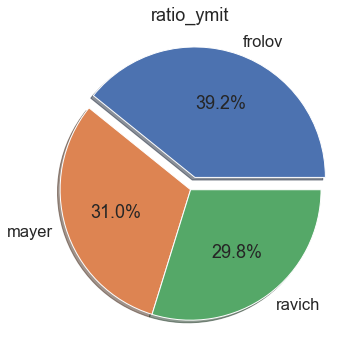

In [399]:
plot_ratio_ymit=all_count_ins.plot.pie(y='count_insight', title="ratio_ymit", legend=False, \
                   autopct='%1.1f%%', explode=(0.1, 0, 0), \
                   shadow=True, startangle=0).set_ylabel('')
plt.show()

In [400]:
count_web_um=all_new_df.groupby(['teacher','webinar']) \
    .agg({'webinar':'count'}) \
    .rename(columns={'webinar':'count_web_um'}) 

In [401]:
count_web_um

count_web_um
teacher webinar              
frolov  1 веб              12
        10 веб             11
        11 веб              6
        12 веб             40
        2 веб              15
        3 веб              18
        4 веб               9
        5 веб               5
        6 веб              17
        7 веб              21
        8 веб              22
        9 веб              11
mayer   1 веб              10
        10 веб              7
        11 веб              5
        12 веб             10
        13 веб             12
        14 веб              6
        15 веб              5
        16 веб             16
        2 веб              16
        3 веб               7
        4 веб              13
        5 веб              18
        6 веб               6
        7 веб               4
        8 веб              10
        9 веб               3
ravich  1 веб               5
        10 веб             55
        2 веб              10
        3 веб               4
        4 веб               7
        5 веб               6
        6 веб              32
        7 веб              13
        8 веб               3
        9 веб               7

In [402]:
frolov_web_um=count_web_um=all_new_df \
    .query("teacher == 'frolov'") \
    .groupby('webinar') \
    .agg({'discipline':'count'}) \
    .rename(columns={'discipline':'count_web_um'}) 


In [403]:
frolov_web_um

,count_web_um
webinar,
1 веб,12
10 веб,11
11 веб,6
12 веб,40
2 веб,15
3 веб,18
4 веб,9
5 веб,5
6 веб,17


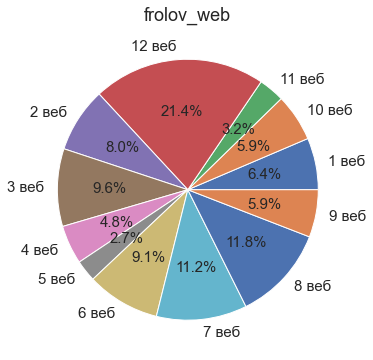

In [404]:
plot_frolov_web_um=frolov_web_um.plot.pie(y='count_web_um', title="frolov_web", legend=False, \
                   autopct='%1.1f%%',fontsize = 15, \
                   shadow=False, startangle=0).set_ylabel('')
plt.show()

In [405]:
mayer_web_um=count_web_um=all_new_df \
    .query("teacher == 'mayer'") \
    .groupby('webinar') \
    .agg({'discipline':'count'}) \
    .rename(columns={'discipline':'count_web_um'})

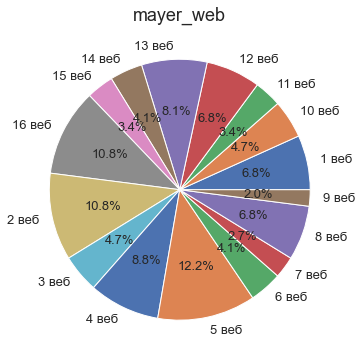

In [406]:
plot_mayer_web_um=mayer_web_um.plot.pie(y='count_web_um', title="mayer_web", legend=False, \
                   autopct='%1.1f%%',fontsize = 13, \
                   shadow=False, startangle=0).set_ylabel('')
plt.show()

In [407]:
ravich_web_um=count_web_um=all_new_df \
    .query("teacher == 'ravich'") \
    .groupby('webinar') \
    .agg({'discipline':'count'}) \
    .rename(columns={'discipline':'count_web_um'})

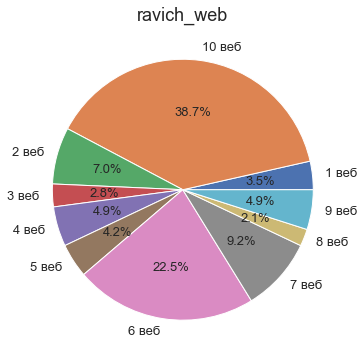

In [408]:
plot_ravich_web_um=ravich_web_um.plot.pie(y='count_web_um', title="ravich_web", legend=False, \
                   autopct='%1.1f%%',fontsize = 13, \
                   shadow=False, startangle=0).set_ylabel('')
plt.show()

In [409]:
all_ratio_ins=all_new_df.groupby('insight') \
    .agg({'discipline':'count'}) \
    .rename(columns={'discipline':'count_insight'})

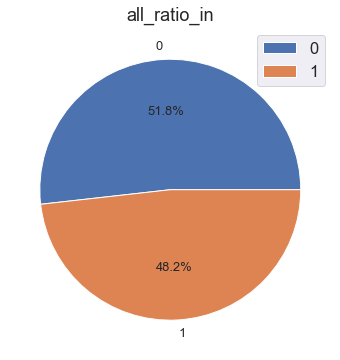

In [410]:
plot_all_ratio_ins=all_ratio_ins.plot.pie(y='count_insight', title="all_ratio_in", legend=True, \
                   autopct='%1.1f%%',fontsize = 13, \
                   shadow=False, startangle=0).set_ylabel('')
plt.show()

In [411]:
all_new_df.groupby(['teacher','insight']) \
    .agg({'discipline':'count'}) \
    .rename(columns={'discipline':'count_insight'})

count_insight
teacher insight               
frolov  0                  124
        1                   63
mayer   0                   55
        1                   93
ravich  0                   68
        1                   74

In [412]:
count_ins_teach=all_new_df.groupby(['teacher','insight'],as_index=False) \
    .agg({'discipline':'count'}) \
    .rename(columns={'discipline':'count_insight'})

In [413]:
count_ins_teach

,teacher,insight,count_insight
0,frolov,0,124
1,frolov,1,63
2,mayer,0,55
3,mayer,1,93
4,ravich,0,68
5,ravich,1,74


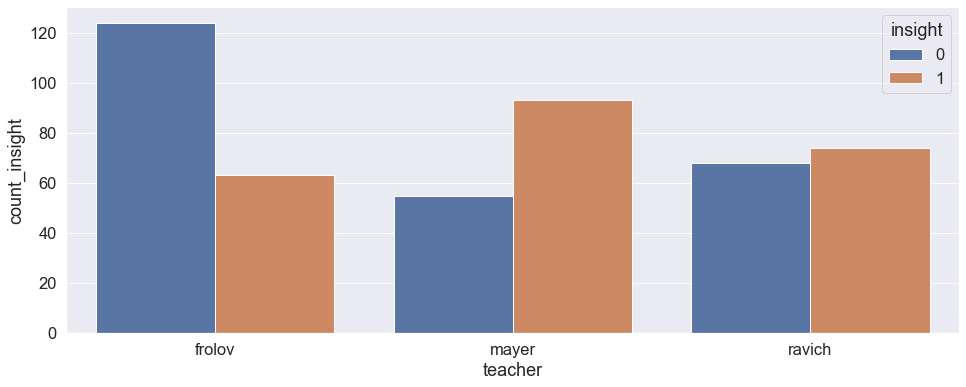

In [414]:
graf_ins_teach=sns.barplot(x="teacher", y="count_insight", hue="insight", data=count_ins_teach)

In [415]:
all_new_df.groupby(['teacher','ymit'],as_index=False) \
    .agg({'discipline':'count'}) \
    .rename(columns={'discipline':'count_ymit'}) \
    .sort_values('count_ymit',ascending=False)

,teacher,ymit,count_ymit
4,frolov,12,7
12,frolov,45,6
169,ravich,329,6
168,ravich,328,6
5,frolov,19,6
...,...,...,...
89,mayer,29,1
90,mayer,30,1
91,mayer,31,1
92,mayer,32,1


In [416]:
frolov_count_ins=all_new_df \
    .query("teacher == 'frolov'") \
    .groupby('insight') \
    .agg({'discipline':'count'}) \
    .rename(columns={'discipline':'count_insight'})

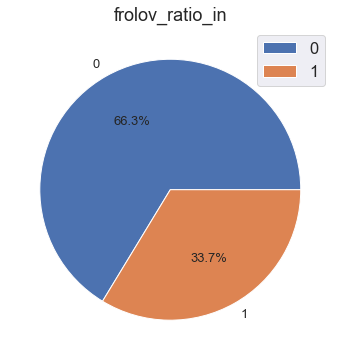

In [417]:
plot_frolov_count_ins=frolov_count_ins.plot.pie(y='count_insight', title="frolov_ratio_in", legend=True, \
                   autopct='%1.1f%%',fontsize = 13, \
                   shadow=False, startangle=0).set_ylabel('')
plt.show()

In [418]:
mayer_count_ins=all_new_df \
    .query("teacher == 'mayer'") \
    .groupby('insight') \
    .agg({'discipline':'count'}) \
    .rename(columns={'discipline':'count_insight'})

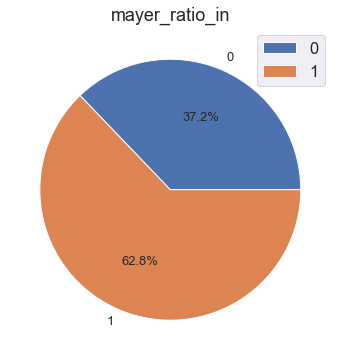

In [419]:
plot_mayer_count_ins=mayer_count_ins.plot.pie(y='count_insight', title="mayer_ratio_in", legend=True, \
                   autopct='%1.1f%%',fontsize = 13, \
                   shadow=False, startangle=0).set_ylabel('')
plt.show()

In [420]:
ravich_count_ins=all_new_df \
    .query("teacher == 'ravich'") \
    .groupby('insight') \
    .agg({'discipline':'count'}) \
    .rename(columns={'discipline':'count_insight'})

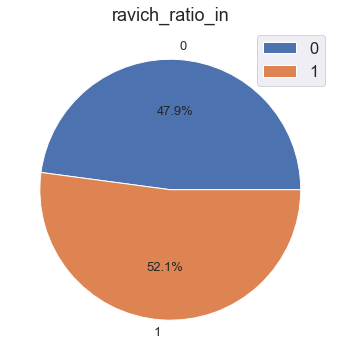

In [421]:
plot_ravich_count_ins=ravich_count_ins.plot.pie(y='count_insight', title="ravich_ratio_in", legend=True, \
                   autopct='%1.1f%%',fontsize = 13, \
                   shadow=False, startangle=0).set_ylabel('')
plt.show()

In [422]:
# Конвертируем dataframe в JSON

In [423]:
"{‘split’-, ‘records’ ? внутри по индексам, ‘index’ ?внутри по индексам, \
‘columns’ каждая табличка  по отдельности с индесом, ‘values’ значения но по index, ‘table’}"

'{‘split’-, ‘records’ ? внутри по индексам, ‘index’ ?внутри по индексам, ‘columns’ каждая табличка  по отдельности с индесом, ‘values’ значения но по index, ‘table’}'

In [424]:
json = all_new_df.to_json("all_info.json",orient='records',force_ascii=False)

In [425]:
json

In [426]:
"all_info.json"

'all_info.json'

In [427]:
# Тестирование и пред разработка, смотреть не обязательно 

In [428]:
change_data=him_ege_mayer.loc[:,18:20]

In [429]:
change_data 

,18,19,20
0,7 веб,NaN,NaN
1,Скорость химических реакций.,NaN,NaN
2,УМИТ (название),УМИТ (номер в базе),СТАТУС\nРазбирается – детальное исследование о...
3,"Факторы, влияющие на скорость химической реакции",23,Разбирается
4,Гомогенные и гетерогенные химические реакции,1207,Проходится
5,Влияние катализаторов и ингибиторов на скорост...,1251,Разбирается
6,Умение составлять и решать пропорции,1213,NaN
7,NaN,NaN,NaN
8,NaN,NaN,NaN
9,NaN,NaN,NaN


In [430]:
test2 = him_ege_mayer.loc[3:,18:20]

In [431]:
test2

,18,19,20
3,"Факторы, влияющие на скорость химической реакции",23,Разбирается
4,Гомогенные и гетерогенные химические реакции,1207,Проходится
5,Влияние катализаторов и ингибиторов на скорост...,1251,Разбирается
6,Умение составлять и решать пропорции,1213,NaN
7,NaN,NaN,NaN
8,NaN,NaN,NaN
9,NaN,NaN,NaN
10,NaN,NaN,NaN
11,NaN,NaN,NaN
12,NaN,NaN,NaN


In [432]:
him_ege_mayer_info={'discipline':'him','appointment':'ege','teacher':'mayer'}

In [433]:
web=him_ege_mayer.iloc[0][18]

In [434]:
test2.insert(0, 'discipline', him_ege_mayer_info['discipline'])
test2.insert(1, 'appointment', him_ege_mayer_info['appointment'])
test2.insert(2, 'teacher', him_ege_mayer_info['teacher'])
test2.insert(3,'webinar', web)

In [435]:
test2

,discipline,appointment,teacher,webinar,18,19,20
3,him,ege,mayer,7 веб,"Факторы, влияющие на скорость химической реакции",23,Разбирается
4,him,ege,mayer,7 веб,Гомогенные и гетерогенные химические реакции,1207,Проходится
5,him,ege,mayer,7 веб,Влияние катализаторов и ингибиторов на скорост...,1251,Разбирается
6,him,ege,mayer,7 веб,Умение составлять и решать пропорции,1213,NaN
7,him,ege,mayer,7 веб,NaN,NaN,NaN
8,him,ege,mayer,7 веб,NaN,NaN,NaN
9,him,ege,mayer,7 веб,NaN,NaN,NaN
10,him,ege,mayer,7 веб,NaN,NaN,NaN
11,him,ege,mayer,7 веб,NaN,NaN,NaN
12,him,ege,mayer,7 веб,NaN,NaN,NaN


In [436]:
test2=test2 \
    .rename(columns={18:'name_ymit',19:'ymit',20:'insight'}) 

In [437]:
test2

,discipline,appointment,teacher,webinar,name_ymit,ymit,insight
3,him,ege,mayer,7 веб,"Факторы, влияющие на скорость химической реакции",23,Разбирается
4,him,ege,mayer,7 веб,Гомогенные и гетерогенные химические реакции,1207,Проходится
5,him,ege,mayer,7 веб,Влияние катализаторов и ингибиторов на скорост...,1251,Разбирается
6,him,ege,mayer,7 веб,Умение составлять и решать пропорции,1213,NaN
7,him,ege,mayer,7 веб,NaN,NaN,NaN
8,him,ege,mayer,7 веб,NaN,NaN,NaN
9,him,ege,mayer,7 веб,NaN,NaN,NaN
10,him,ege,mayer,7 веб,NaN,NaN,NaN
11,him,ege,mayer,7 веб,NaN,NaN,NaN
12,him,ege,mayer,7 веб,NaN,NaN,NaN


In [438]:
test2.query("ymit == ymit or name_ymit == name_ymit or insight == insight")

,discipline,appointment,teacher,webinar,name_ymit,ymit,insight
3,him,ege,mayer,7 веб,"Факторы, влияющие на скорость химической реакции",23,Разбирается
4,him,ege,mayer,7 веб,Гомогенные и гетерогенные химические реакции,1207,Проходится
5,him,ege,mayer,7 веб,Влияние катализаторов и ингибиторов на скорост...,1251,Разбирается
6,him,ege,mayer,7 веб,Умение составлять и решать пропорции,1213,NaN


In [439]:
web=him_ege_mayer.iloc[1][0]

In [440]:
web

'Строение атома и электронные конфигурации.'

In [441]:
test2=test2.query("name_ymit != 'nan' or ymit != 'nan' or insight != 'nan'") 

In [442]:
test2

,discipline,appointment,teacher,webinar,name_ymit,ymit,insight
3,him,ege,mayer,7 веб,"Факторы, влияющие на скорость химической реакции",23,Разбирается
4,him,ege,mayer,7 веб,Гомогенные и гетерогенные химические реакции,1207,Проходится
5,him,ege,mayer,7 веб,Влияние катализаторов и ингибиторов на скорост...,1251,Разбирается
6,him,ege,mayer,7 веб,Умение составлять и решать пропорции,1213,NaN
7,him,ege,mayer,7 веб,NaN,NaN,NaN
8,him,ege,mayer,7 веб,NaN,NaN,NaN
9,him,ege,mayer,7 веб,NaN,NaN,NaN
10,him,ege,mayer,7 веб,NaN,NaN,NaN
11,him,ege,mayer,7 веб,NaN,NaN,NaN
12,him,ege,mayer,7 веб,NaN,NaN,NaN
